In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, Input
import cv2
import os
import PIL 

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pathlib
data_dir = pathlib.Path("/content/drive/MyDrive/TensorFlow2.0/Datasets/BrainTumorDataset")
data_dir

PosixPath('/content/drive/MyDrive/TensorFlow2.0/Datasets/BrainTumorDataset')

In [ ]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('/content/drive/MyDrive/TensorFlow2.0/Datasets/BrainTumorDataset/no/10 no.jpg'),
 PosixPath('/content/drive/MyDrive/TensorFlow2.0/Datasets/BrainTumorDataset/no/12 no.jpg'),
 PosixPath('/content/drive/MyDrive/TensorFlow2.0/Datasets/BrainTumorDataset/no/11 no.jpg'),
 PosixPath('/content/drive/MyDrive/TensorFlow2.0/Datasets/BrainTumorDataset/no/N16.jpg'),
 PosixPath('/content/drive/MyDrive/TensorFlow2.0/Datasets/BrainTumorDataset/no/N17.jpg'),
 PosixPath('/content/drive/MyDrive/TensorFlow2.0/Datasets/BrainTumorDataset/no/N15.jpg'),
 PosixPath('/content/drive/MyDrive/TensorFlow2.0/Datasets/BrainTumorDataset/no/9 no.jpg'),
 PosixPath('/content/drive/MyDrive/TensorFlow2.0/Datasets/BrainTumorDataset/no/N11.jpg'),
 PosixPath('/content/drive/MyDrive/TensorFlow2.0/Datasets/BrainTumorDataset/no/6 no.jpg'),
 PosixPath('/content/drive/MyDrive/TensorFlow2.0/Datasets/BrainTumorDataset/no/8 no.jpg'),
 PosixPath('/content/drive/MyDrive/TensorFlow2.0/Datasets/BrainTumorDataset/no/7 no.jpg'),


In [ ]:
len(list(data_dir.glob('*/*.jpg')))

171

In [ ]:
yes = list(data_dir.glob('yes/*'))

In [ ]:
yes[:5]

[PosixPath('/content/drive/MyDrive/TensorFlow2.0/Datasets/BrainTumorDataset/yes/Y156.JPG'),
 PosixPath('/content/drive/MyDrive/TensorFlow2.0/Datasets/BrainTumorDataset/yes/Y153.jpg'),
 PosixPath('/content/drive/MyDrive/TensorFlow2.0/Datasets/BrainTumorDataset/yes/Y13.jpg'),
 PosixPath('/content/drive/MyDrive/TensorFlow2.0/Datasets/BrainTumorDataset/yes/Y15.jpg'),
 PosixPath('/content/drive/MyDrive/TensorFlow2.0/Datasets/BrainTumorDataset/yes/Y154.jpg')]

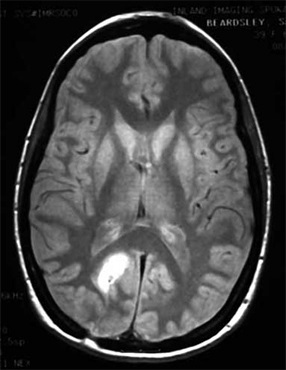

In [ ]:
PIL.Image.open(str(yes[0]))

In [ ]:
brain_images_dict = {
    "yes" : list(data_dir.glob('yes/*')),
    "no" : list(data_dir.glob('no/*')),
}

In [ ]:
brain_labels_dict = {
    "yes" : 1,
    "no" : 0,
}

In [ ]:
brain_images_dict['yes'][0]

PosixPath('/content/drive/MyDrive/TensorFlow2.0/Datasets/BrainTumorDataset/yes/Y156.JPG')

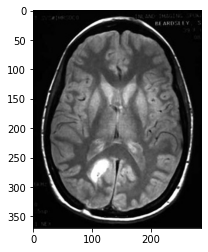

In [ ]:
img = cv2.imread(str(brain_images_dict['yes'][0]))
img.shape
plt.imshow(img)

In [ ]:
img = cv2.resize(img, (256, 256))

In [ ]:
img.shape

(256, 256, 3)

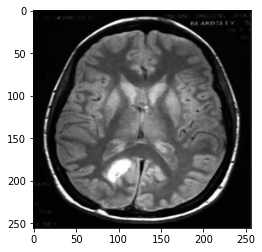

In [ ]:
plt.imshow(img)

In [ ]:
# Preparing x and y
x, y = [], []
for label, imgList in brain_images_dict.items():
  for imgPath in imgList:
    img = cv2.imread(str(imgPath))
    img_resize = cv2.resize(img, (256, 256))
    x.append(img_resize)
    y.append(brain_labels_dict[label])

In [ ]:
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(253, 256, 256, 3)
(253,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(189, 256, 256, 3)
(189,)
(64, 256, 256, 3)
(64,)


In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0
x_train[0]

array([[[0.07058824, 0.07058824, 0.07058824],
        [0.05098039, 0.05098039, 0.05098039],
        [0.04313725, 0.04313725, 0.04313725],
        ...,
        [0.04705882, 0.04705882, 0.04705882],
        [0.04705882, 0.04705882, 0.04705882],
        [0.04705882, 0.04705882, 0.04705882]],

       [[0.0627451 , 0.0627451 , 0.0627451 ],
        [0.        , 0.        , 0.        ],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.05490196, 0.05490196, 0.05490196],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       ...,

       [[0.10980392, 0.08235294, 0.10980392],
        [0.10980392, 0.08627451, 0.10588235],
        [0.10980392, 0

In [92]:
# Declaring the layers of the model

i = Input(shape=x_train[0].shape)

x = Conv2D(32, (5, 5), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (5, 5), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (5, 5), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (5, 5), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (5, 5), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (5, 5), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (5, 5), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(128,  (5, 5), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(len(set(y_train)), activation='softmax')(x)

# Finish layers declaration

In [93]:
from tensorflow.keras.models import Model
model = Model(i, x)

In [94]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
6/6 [==============================] - 234s 39s/step - loss: 1.6504 - accuracy: 0.5450 - val_loss: 1.2921 - val_accuracy: 0.5469
Epoch 2/10
6/6 [==============================] - 232s 39s/step - loss: 1.1854 - accuracy: 0.6667 - val_loss: 0.7117 - val_accuracy: 0.5781
Epoch 3/10
6/6 [==============================] - 232s 39s/step - loss: 0.7936 - accuracy: 0.6772 - val_loss: 0.9082 - val_accuracy: 0.5781
Epoch 4/10
6/6 [==============================] - 237s 40s/step - loss: 0.8346 - accuracy: 0.6190 - val_loss: 0.7722 - val_accuracy: 0.5781
Epoch 5/10
6/6 [==============================] - 231s 39s/step - loss: 0.6279 - accuracy: 0.7090 - val_loss: 0.8945 - val_accuracy: 0.5625
Epoch 6/10
6/6 [==============================] - 232s 39s/step - loss: 0.6750 - accuracy: 0.6667 - val_loss: 0.9356 - val_accuracy: 0.4531
Epoch 7/10
6/6 [==============================] - 234s 39s/step - loss: 0.5316 - accuracy: 0.7460 - val_loss: 0.8599 - val_accuracy: 0.5781
Epoch 8/10
6/6 [====

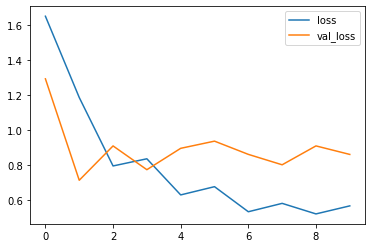

In [95]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

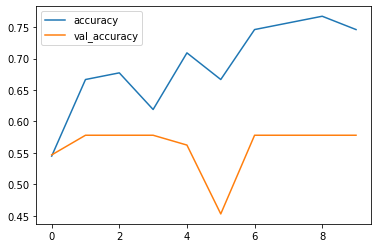

In [96]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()